#DataSet do Spotfy



    Acousticness/Acústica: Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

    Danceability/Dançabilidade: Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

    Duration_ms:Variável numérica, a duração da trilha em milissegundos.

    Duration_min: Variável numérica, a duração da faixa em minutos.

    Energy/Energia: Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

    Explicit/Explícito: Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

    Id: O ID do Spotify para a faixa.

    Instrumentalness/Instrumentalidade: Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

    Key/Chave:Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

    Liveness/ Ao vivo: Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

    Loudness/ Volume em dB: Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

    Mode/ Modo: Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

    Popularity/Popularidade: Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

    Speechiness/Fala: Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

    Tempo: Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

    Valence/Valência: Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

    Year/Ano: Ano em que a música foi lançada.

Fonte: https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features

In [9]:
import pandas as pd
import numpy as np

dados = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/Dados_totais.csv')

dados.head(2)    

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [10]:
dados["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [11]:
dados.shape

(20311, 19)

#Preparação do DataSet

In [12]:
#elimina colunas que não serão utilizadas
dados = dados.drop(["explicit", "key", "mode"], axis=1)
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [13]:
#verifica se há valores faltantes
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [14]:
#Identifica a quantidade de artistas
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [15]:
#Transforma a coluna artists em várias colunas binárias com one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies  

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

Cria PCA para melhor trabalhar com o dataset de mais de 800 colunas

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
     
SEED = 1224
np.random.seed(SEED)
#Cria uma pipeline do Sklearn utilizando o StandarScaler para transformar os valores numéricos do dataset numa escala padrão a fim de que possam ser melhor interpretados pelo PCA
#Cria uma PCA para explicar 70% (0.7) dos dados do dataset
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])

#elimina do dataset enviado para o PCA 3 outras colunas com texto, pois o PCA apenas trabalha com variáveis do tipo numéricas
music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)

In [21]:
#apresenta o número de componentes da PCA
pca_pipeline[1].n_components_

612

#Cria clusterização usando KMeans

In [22]:
from sklearn.cluster import KMeans
     
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)


projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']
     
projection_m

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  2.241192e-11  1.202033e-13  3.177821e-12            5   
1     -0.030234 -2.395758e-12  2.291641e-13 -1.187264e-12           12   
2     -0.012781  4.273933e-12 -6.407207e-13 -1.958694e-13           20   
3     -0.040911  5.152080e-11 -7.249490e-13  1.084807e-11           12   
4     -0.010033  2.254040e-12  1.683896e-13  8.389616e-13           12   
...         ...           ...           ...           ...          ...   
20306 -0.125947  4.217717e-11 -4.175589e-13  5.457610e-11           30   
20307  0.000054  4.323403e-11  1.154738e-11  9.481307e-12           30   
20308 -0.065180 -2.580928e-11  9.953739e-12  4.430351e-11           30   
20309  0.108493  5.473520e-11  1.333316e-11  1.185832e-11           30   
20310 -0.010372  2.372825e-12  1.582875e-13  8.373194e-13           30   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

Analisa o cluster

In [25]:
#Cria gráfico a partir dos 2 componentes principais do cluster distribuídos em x e y apresentando os 50 clusteres por cores
import plotly.express as px
fig = px.scatter(
   projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'song'])
fig.show()

In [26]:
#Apresenta o percentual de explicabilidade da PCA
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [27]:
#Apresenta o quantas variáveis do dataset são explicadas pelo PCA
pca_pipeline[1].explained_variance_.sum()

620.9313218688688

#Testa recomendação a partir de uma música usando o cluster da música e a distância em relação a outras músicas neste cluster

In [23]:
#Música escolhida pelo usuário
nome_musica = 'Ed Sheeran - Shape of You'

from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

#Identifica o cluster da música escolhida pelo usuário
cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
#seleciona músicas do mesmo cluster da música escolhida
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]

#Como o PCA traz os componentes por ordem de relevância e vamos montar um gráfico bidimensional, vamos selecionar os 2 primeiros componentes da música escolhida
#Identifica o primeiro componente para a música escolhida
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
#Identifica o segundo componente para a música escolhida
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

#Cálcula a distância euclidiana entre a música escolhida e as demais músicas do cluster
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias']= distancias
#ordena as músicas recomendadas (mesmo cluster), a partir da distância euclidiana dos 2 primeiros componentes (x e y) da música escolhida
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                               song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
13421 -0.826575 -2.915302                    $uicideBoy$ - For the Last Time   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
13682 -0.878031 -2.944654    YoungBoy Never Broke Again - House Arrest Tingz   
15392 -0.792012 -2.987829                         $uicideBoy$ - Putrid Pride   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
2660  -0.869469 -3.011060                        Tyga - Taste (feat. Offset)   

                           id  distancias  
2463   7qiZfU4dY1lWllzX7mPBI3    0.000000  
13421  240audWazVjwvwh7XwfSZE    0.024393  
2942   3Z8FwOEN59mRMxDCtb8N0A    0.045213  
5371   1EWkw4Fa6IlnsAihLUlFFM    0.049025  
13682  4Boj4bBiDv6Ur1zKEvLXBI    0.051317  
15392  4CwA4CdTQqNv18QSAW3Srk    0.059483  
15388  3QqJ44HiM84iyZS0G2IKIP    0.059533  
5271   4vUmTMuQqjdnvlZmAH61Qk    0.059728  
18479  2wOXxtHZgRkkrkEbKLzzqs    0.077472  
2660   5IaHrVsrferBYDm0bDyABy    0.083072

#Cria Recomendador extraindo as imagens de albuns e nomes a partir de uma API do Spotfy

In [28]:
#Instala biblioteca para obter dados do Spotfy
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 16.2 MB/s eta 0:00:00


In [29]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [30]:
#Necessita de id de usuário e senha para uso do spotfy for developers
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = '5bfbe27dcc3c4455bfa22c908e62e920',
        client_secret = '494ffe2eb85141c1bb7465c820477951')

In [31]:
#Autentica usando as credenciais de acesso
client_credentials_manager = SpotifyClientCredentials(client_id = '5bfbe27dcc3c4455bfa22c908e62e920',client_secret = '494ffe2eb85141c1bb7465c820477951')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [32]:
import matplotlib.pyplot as plt
from skimage import io

#Função de recomendação a partir de um nome de música

def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

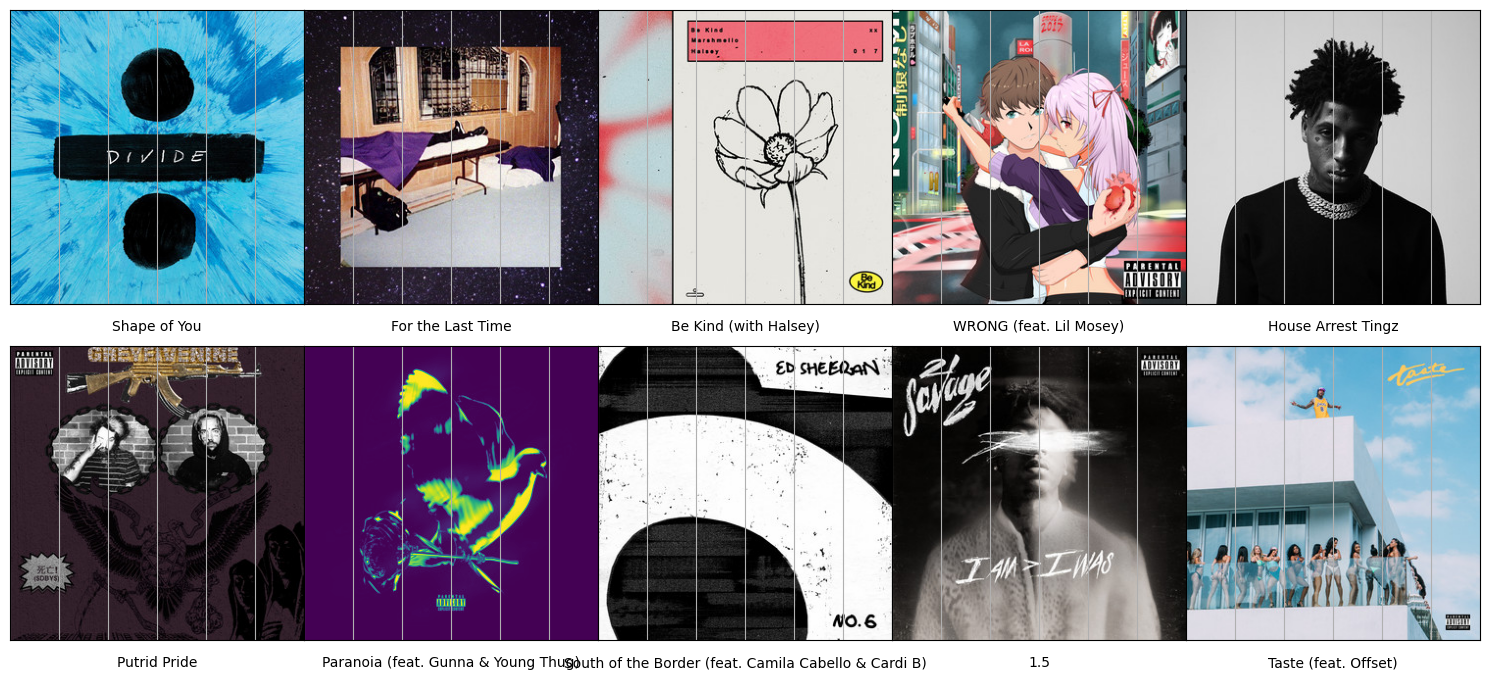

In [33]:
recomendador('Ed Sheeran - Shape of You')

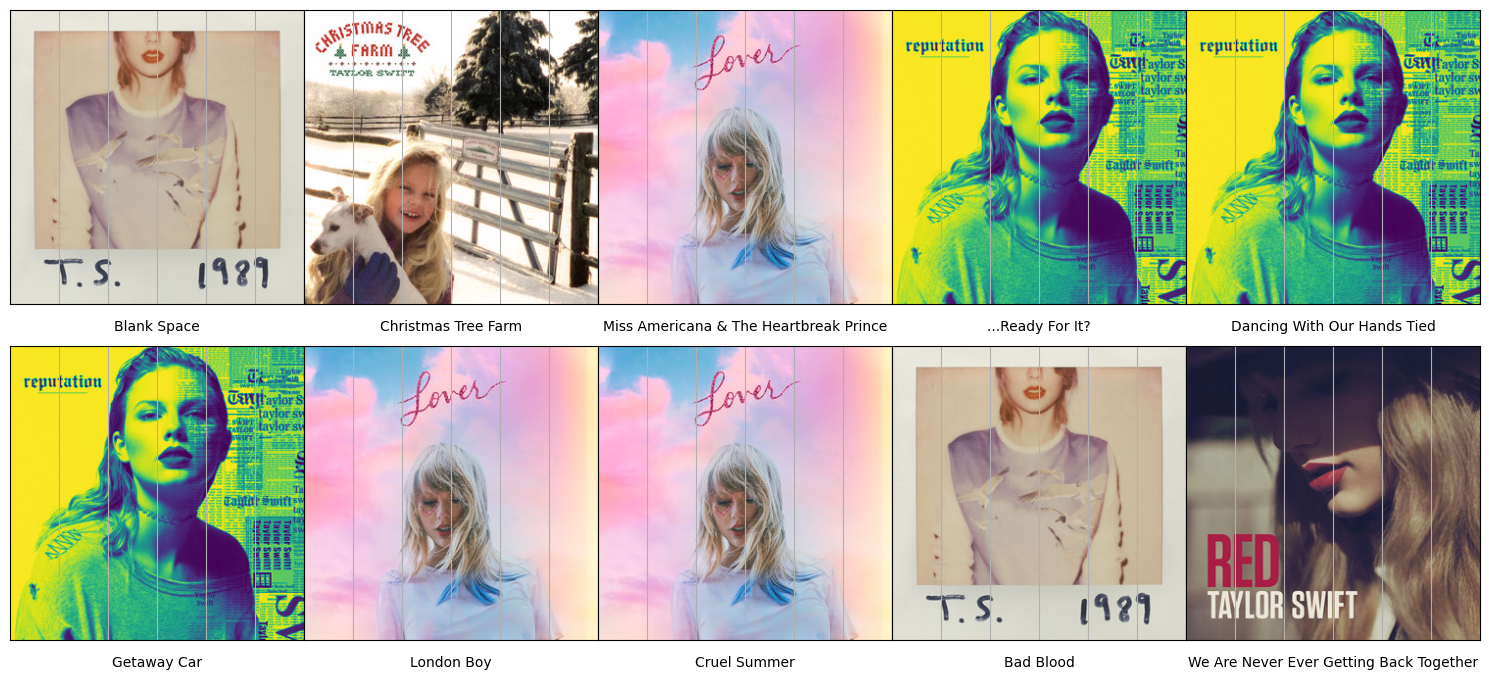

In [34]:
recomendador('Taylor Swift - Blank Space')